# Decision Tree 결정트리
- 결정 트리 분류기는 설명이 중요할 때 아주 유용한 모델이다.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def gini(p):
    return (p)*(1-(p)) + (1- p)*(1-(1-p))

def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))

def error(p):
    return 1-np.max([p, 1-p])

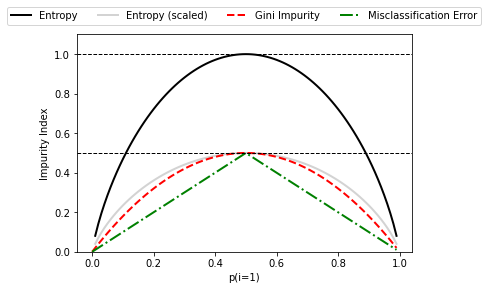

In [6]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax =  plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], ['Entropy','Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'], 
                                                        ['-','-','--','-.'],['black', 'lightgray','red','green','cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1, stratify= y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # 마커와 컬러맵 설정
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계를 그린다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], 
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label = cl,
                   edgecolor = 'black')
        
        #테스트 샘플 부각하기
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            
            plt.scatter(X_test[:,0], X_test[:, 1],
                       facecolors='none', edgecolor='black', alpha = 1.0,
                       linewidth=1, marker = 'o',
                       s=100, label = 'test set')

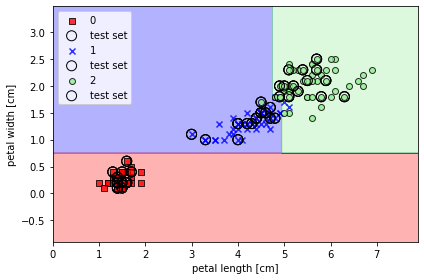

In [13]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [16]:
dot_data = export_graphviz(tree, filled=True, rounded = True, class_names = ['Setosa', 'Versicolor', 'Virginica'], feature_names = ['petal length', 'petal width'], out_file=None)
# filled=True, rounded = True, class_names = ['Setosa', 'Versicolor', 'Virginica'], feature_names 는 선택사항, 결과이미지를 쉽게 하기 위해 추가함.
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

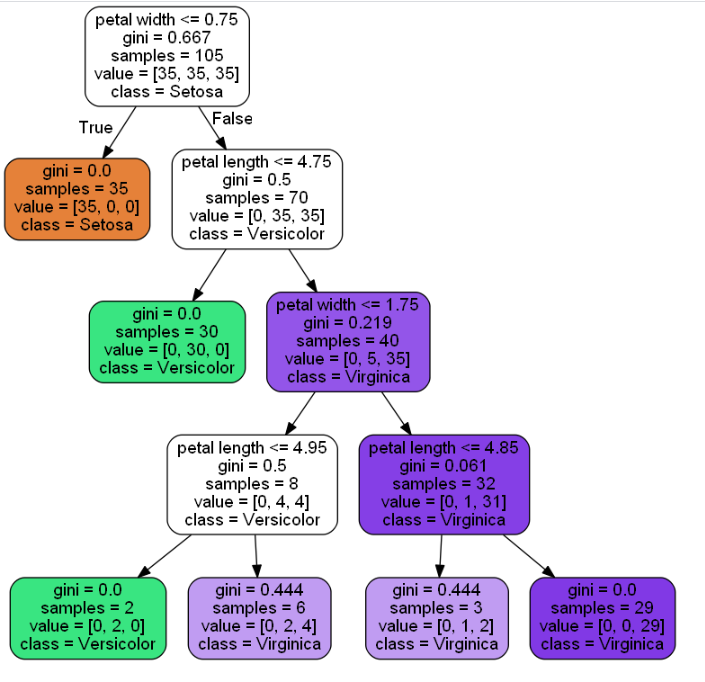

In [17]:
from sklearn.ensemble import RandomForestClassifier 

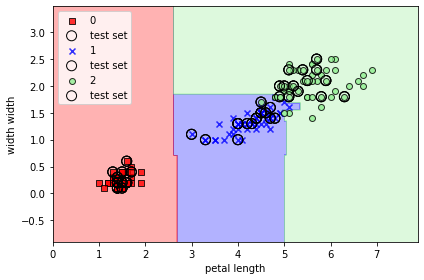

In [18]:
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('width width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# KNN algorithm (K-Nearest Neighbor)

- 숫자 k와 거리 측정 기준을 선택한다
- 분류하려는 샘플에서 k개의 최근접 이웃을 찾는다.
- 다수결 투표를 통해 클래스 레이블을 할당한다.

- 바로 수집된 새로운 훈련데이터에 즉시 적용할 수 있다는 장점을 지님.
- 새로운 샘플을 분류하는 계산복잡도는 단점임

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression(solver='liblinear', multi_class = 'auto', C=100.0, random_state = 1)
lr.fit(X_train_std, y_train)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

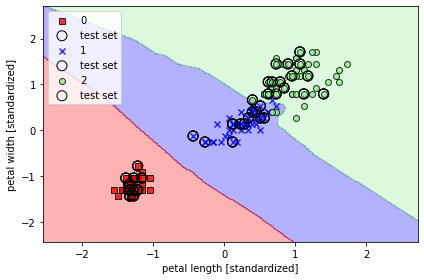

In [25]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski') # p 가 1이면 유클라디안 거리, 2일땐 맨해튼 거리.
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 요약
- 모델 해석이 중요할 때 : Decision Tree
- Logistic Regression은 확률적 경사 하강법을 사용한 온랑니 학습뿐만 아니라, 특정 이벤트 확률을 예측하는 것에도 사용할 수 있음
- Support Vector Machine 은 강력한 선형 모델이지만, 커널 트릭을 사용하여 비선형 문제로도 확장할 수 있다. 이 모델엔 예측 성능을 높이기 위해 튜닝할 하이퍼 파라미터가 많다.
- 반면, RandomForest 같은 ensemble (앙상블) 모델은 매개변수 튜닝이 많이 필요하지 않고, Decision Tree 만큼 쉽게 overfitting 되지 않는다. 실전에서 여러문제에 적용하기 좋음
- KNN classifier 는 학습을 통한 다른 종류의 분류방식을 이요한다. 모델 훈련없이 예측을 만들지만, 예측단계에 계산비용이 높다.